# Trabalho 1 - Laboratório prático

#### Edgar Basto n. 93575



### Importar librarias

In [1]:
import numpy as np
import pandas as pd

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

## 1. Carregamento e preparação dos dados

Importa preparar as dataframes com para posteriormente ser mais fácil importar os arrays que desejamos para trabalhar como numpy.

### 1.1. Movies

In [2]:
dfMovies = pd.read_csv('ml-latest-small/movies.csv')

In [3]:
print(dfMovies.shape)
print(dfMovies.columns)

(9742, 3)
Index(['movieId', 'title', 'genres'], dtype='object')


In [4]:
dfMovies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


##### Separação dos 'genres' através de uma função anónima

In [5]:
dfMovies['genres'] = dfMovies['genres'].apply(lambda x: x.split('|'))
dfMovies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"
9741,193609,Andrew Dice Clay: Dice Rules (1991),[Comedy]


### 1.2. Ratings

In [6]:
dfRatings = pd.read_csv('ml-latest-small/ratings.csv')
dfRatings.drop(columns=['userId', 'timestamp'], inplace=True)
print(dfRatings.shape)
dfRatings.head()

(100836, 2)


,movieId,rating
0,1,4.0
1,3,4.0
2,6,4.0
3,47,5.0
4,50,5.0


### 1.3. Tags

In [7]:
dfTags = pd.read_csv('ml-latest-small/tags.csv')
dfTags.drop(columns=['userId', 'timestamp'], inplace=True)
print(dfTags.shape)
dfTags.head()

(3683, 2)


,movieId,tag
0,60756,funny
1,60756,Highly quotable
2,60756,will ferrell
3,89774,Boxing story
4,89774,MMA


##### Exemplo para verificar quando for feito um merge das linhas

In [8]:
dfTags.loc[dfTags['movieId'].isin([1, 60756])] #para movieId = 1 ou = 60756

,movieId,tag
0,60756,funny
1,60756,Highly quotable
2,60756,will ferrell
205,60756,comedy
206,60756,funny
207,60756,will ferrell
629,1,pixar
909,60756,funny
910,60756,will ferrell
981,1,pixar


In [9]:
dfTags = dfTags.groupby('movieId').agg(lambda x: list(set(x))).reset_index()

In [10]:
dfTags.loc[dfTags['movieId'].isin([1, 60756])] #confirmação

,movieId,tag
0,1,"[pixar, fun]"
1407,60756,"[will ferrell, Highly quotable, funny, comedy]"


### 1.4. Merge dos dataframes que foram carregados

In [11]:
print(f'Movies shape: {dfMovies.shape}')
print(f'Movies columns: {dfMovies.columns}')
print(f'Ratings shape: {dfRatings.shape}')
print(f'Ratings columns: {dfRatings.columns}')
print(f'Tags shape: {dfTags.shape}')
print(f'Tags columns: {dfTags.columns}')

Movies shape: (9742, 3)
Movies columns: Index(['movieId', 'title', 'genres'], dtype='object')
Ratings shape: (100836, 2)
Ratings columns: Index(['movieId', 'rating'], dtype='object')
Tags shape: (1572, 2)
Tags columns: Index(['movieId', 'tag'], dtype='object')


In [12]:
df = dfMovies.merge(dfRatings, on='movieId', how='left').merge(dfTags, on='movieId')

In [145]:
df.loc[df['title'].isin(['Star Wars: Episode V - The Empire Strikes Back (1980)'])]

,movieId,title,genres,rating,tag
15782,1196,Star Wars: Episode V - The Empire Strikes Back...,"[Action, Adventure, Sci-Fi]",5.0,"[space, original plot, George Lucas, space ope..."
15783,1196,Star Wars: Episode V - The Empire Strikes Back...,"[Action, Adventure, Sci-Fi]",5.0,"[space, original plot, George Lucas, space ope..."
15784,1196,Star Wars: Episode V - The Empire Strikes Back...,"[Action, Adventure, Sci-Fi]",4.0,"[space, original plot, George Lucas, space ope..."
15785,1196,Star Wars: Episode V - The Empire Strikes Back...,"[Action, Adventure, Sci-Fi]",5.0,"[space, original plot, George Lucas, space ope..."
15786,1196,Star Wars: Episode V - The Empire Strikes Back...,"[Action, Adventure, Sci-Fi]",3.0,"[space, original plot, George Lucas, space ope..."
15787,1196,Star Wars: Episode V - The Empire Strikes Back...,"[Action, Adventure, Sci-Fi]",5.0,"[space, original plot, George Lucas, space ope..."
15788,1196,Star Wars: Episode V - The Empire Strikes Back...,"[Action, Adventure, Sci-Fi]",4.0,"[space, original plot, George Lucas, space ope..."
15789,1196,Star Wars: Episode V - The Empire Strikes Back...,"[Action, Adventure, Sci-Fi]",4.0,"[space, original plot, George Lucas, space ope..."
15790,1196,Star Wars: Episode V - The Empire Strikes Back...,"[Action, Adventure, Sci-Fi]",4.5,"[space, original plot, George Lucas, space ope..."
15791,1196,Star Wars: Episode V - The Empire Strikes Back...,"[Action, Adventure, Sci-Fi]",4.0,"[space, original plot, George Lucas, space ope..."


In [14]:
print(df.shape)
print(df.columns)

(48305, 5)
Index(['movieId', 'title', 'genres', 'rating', 'tag'], dtype='object')


In [15]:
df.head()

,movieId,title,genres,rating,tag
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",4.0,"[pixar, fun]"
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",4.0,"[pixar, fun]"
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",4.5,"[pixar, fun]"
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",2.5,"[pixar, fun]"
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",4.5,"[pixar, fun]"


### 1.5. Criação de uma dataframe sem NaN para agregação do 'rating' e contabilização do número de ratings

Todas as linhas com um NaN value serão excluídas, ou seja para a lista final só passam os registos que têm rating.

In [16]:
data = dfMovies.merge(dfRatings, on='movieId')

In [17]:
data['count'] = 1

In [18]:
data.isnull().values.any() #Verificação se existe algum NaN

False

In [19]:
data.tail()

,movieId,title,genres,rating,count
100831,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",4.0,1
100832,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",3.5,1
100833,193585,Flint (2017),[Drama],3.5,1
100834,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",3.5,1
100835,193609,Andrew Dice Clay: Dice Rules (1991),[Comedy],4.0,1


In [20]:
data = data.groupby(['movieId', 'title']).agg({'rating': 'mean', 'count':'sum'}).reset_index()

In [21]:
data.head()

,movieId,title,rating,count
0,1,Toy Story (1995),3.920930,215
1,2,Jumanji (1995),3.431818,110
2,3,Grumpier Old Men (1995),3.259615,52
3,4,Waiting to Exhale (1995),2.357143,7
4,5,Father of the Bride Part II (1995),3.071429,49


In [22]:
data.shape

(9724, 4)

## 2. Exploração dos dados através de arrays Numpy

### 2.1. Ratings

In [23]:
ratings = np.array(data['rating'])

In [24]:
print(f'Total de registos no nosso array: {len(ratings)}')

Total de registos no nosso array: 9724


#### 2.1.1. Sumário

In [25]:
print('Média: ', ratings.mean())
print('Desvio Padrão: ', ratings.std())
print('Mínimo: ', ratings.min())
print('Máximo: ', ratings.max())
print('Percentil Q1 (25): ', np.percentile(ratings, 25))
print('Mediana: ', np.median(ratings))
print('Percentil Q3 (75): ', np.percentile(ratings, 75))


Média:  3.262448274810963
Desvio Padrão:  0.869828905158302
Mínimo:  0.5
Máximo:  5.0
Percentil Q1 (25):  2.8
Mediana:  3.4166666666666665
Percentil Q3 (75):  3.911764705882353


#### 2.1.2. Total de filmes com pontuação igual ou superior a 4

In [26]:
np.sum(ratings >= 4) 

2270

#### 2.1.3. Total de filmes com pontuação entre Q1 e Q3

In [27]:
np.sum((ratings > np.percentile(ratings, 25)) & (np.sum(ratings < np.percentile(ratings, 25)))) 

0

####  2.1.4. Total de filmes com rating 5

In [28]:
np.sum(ratings == 5) 

296

#### 2.1.5. Lista de filmes com rating 5 (dataframe)

In [29]:
data.loc[data['rating'].isin([5])] 

,movieId,title,rating,count
48,53,Lamerica (1994),5.0,2
87,99,Heidi Fleiss: Hollywood Madam (1995),5.0,2
121,148,"Awfully Big Adventure, An (1995)",5.0,1
405,467,Live Nude Girls (1995),5.0,1
432,495,In the Realm of the Senses (Ai no corrida) (1976),5.0,1
433,496,What Happened Was... (1994),5.0,1
531,626,"Thin Line Between Love and Hate, A (1996)",5.0,1
536,633,Denise Calls Up (1995),5.0,1
666,876,Supercop 2 (Project S) (Chao ji ji hua) (1993),5.0,1
864,1140,Entertaining Angels: The Dorothy Day Story (1996),5.0,1


#### 2.1.6. Histograma com os ratings

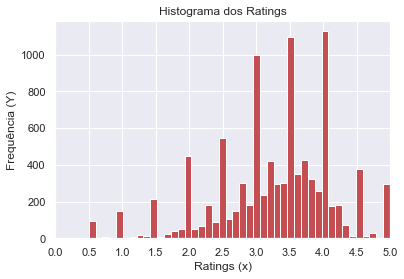

In [152]:
plt.hist(ratings, bins='auto', color='r')
plt.title("Histograma dos Ratings")
plt.xlabel('Ratings (x)')
plt.xlim(left=0, right=5)
plt.xticks(np.arange(0, 5.5, 0.5))
plt.ylabel('Frequência (Y)')
plt.show()

### 2.2. Titles

#### 2.2.1. Criação de um narray de strings

In [30]:
titles = np.array(data['title'], dtype=np.str)
print(f'Confirmação do tipo de cada elemento no narray: {type(titles[0])}')
print(f'Dimensão do narray: {titles.shape}')

Confirmação do tipo de cada elemento no narray: <class 'numpy.str_'>
Dimensão do narray: (9724,)


#### 2.2.2. Separação dos nomes e dos anos dos títulos

Determinação do número de elementos com pelo menos um '(', utilizando o método count do numpy + np.char.count.

In [37]:
print(np.count_nonzero(np.char.count(titles, '(')))

9692


Análise dos títulos que não contêm '('.

In [38]:
for i in titles:
    if '(' not in i:
        print(i, '\n')

Don't Be a Menace to South Central While Drinking Your Juice in  

Dr. Strangelove or: How I Learned to Stop Worrying and Love the  

Everything You Always Wanted to Know About Sex * But Were Afraid 

Fog of War: Eleven Lessons from the Life of Robert S. McNamara,  

Babylon 5 

Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The  

Borat: Cultural Learnings of America for Make Benefit Glorious N 

Maxed Out: Hard Times, Easy Credit and the Era of Predatory Lend 

Babylon 5: The Legend of the Rangers: To Live and Die in Starlig 

Adventures of Mary-Kate and Ashley, The: The Case of the Christm 

Liar's Autobiography: The Untrue Story of Monty Python's Graham  

As I Was Moving Ahead Occasionally I Saw Brief Glimpses of Beaut 

Turtle Power: The Definitive History of the Teenage Mutant Ninja 

Family Guy Presents: Something, Something, Something, Dark Side  

Ready Player One 

Hyena Road 

The Adventures of Sherlock Holmes and Dr. Watson: The Hound of t 

The Adventures of 

##### Verifica-se que há alguns nomes que foram cortados devido, pois o default dtype numpy.str limita a 64 caracteres.

In [39]:
titles.dtype

dtype('<U64')

#### 2.2.3. Nova importação para limitar a string a 128 caracteres.

In [40]:
titles = np.array(data['title'], dtype='>U128')

In [41]:
for i in titles:
    if '(' not in i:
        print(i, '\n')

Babylon 5 

Ready Player One 

Hyena Road 

The Adventures of Sherlock Holmes and Doctor Watson 

Nocturnal Animals 

Paterson 

Moonlight 

The OA 

Cosmos 

Maria Bamford: Old Baby 

Generation Iron 2 

Black Mirror 



##### Index dos valores que não contêm '('

In [42]:
noYearIndex = np.where(np.char.find(titles, '(') == -1)
print(noYearIndex)

(array([6042, 9013, 9073, 9120, 9161, 9241, 9349, 9430, 9496, 9497, 9507,
       9593], dtype=int64),)


In [43]:
titlesSplit = np.char.split(titles, sep = '(')
print(titlesSplit.shape)

(9724,)


Primeiros 5 registos.

In [146]:
titlesSplit[:5]

array([list(['Toy Story ', '1995)']), list(['Jumanji ', '1995)']),
       list(['Grumpier Old Men ', '1995)']),
       list(['Waiting to Exhale ', '1995)']),
       list(['Father of the Bride Part II ', '1995)'])], dtype=object)

Adicionar um ano de referência (9999) a todos os filmes que não têm o ano catalogado.

In [45]:
titlesSplit[6042] = np.hstack((titlesSplit[6042], ['9999']))
titlesSplit[9013] = np.hstack((titlesSplit[9013], ['9999']))
titlesSplit[9073] = np.hstack((titlesSplit[9073], ['9999']))
titlesSplit[9120] = np.hstack((titlesSplit[9120], ['9999']))
titlesSplit[9161] = np.hstack((titlesSplit[9161], ['9999']))
titlesSplit[9241] = np.hstack((titlesSplit[9241], ['9999']))
titlesSplit[9349] = np.hstack((titlesSplit[9349], ['9999']))
titlesSplit[9430] = np.hstack((titlesSplit[9430], ['9999']))
titlesSplit[9496] = np.hstack((titlesSplit[9496], ['9999']))
titlesSplit[9497] = np.hstack((titlesSplit[9497], ['9999']))
titlesSplit[9507] = np.hstack((titlesSplit[9507], ['9999']))
titlesSplit[9593] = np.hstack((titlesSplit[9593], ['9999']))

for i in noYearIndex:
    print(titlesSplit[i])

[array(['Babylon 5', '9999'], dtype='<U9')
 array(['Ready Player One', '9999'], dtype='<U16')
 array(['Hyena Road', '9999'], dtype='<U10')
 array(['The Adventures of Sherlock Holmes and Doctor Watson', '9999'],
      dtype='<U51')
 array(['Nocturnal Animals', '9999'], dtype='<U17')
 array(['Paterson', '9999'], dtype='<U8')
 array(['Moonlight', '9999'], dtype='<U9')
 array(['The OA', '9999'], dtype='<U6')
 array(['Cosmos', '9999'], dtype='<U6')
 array(['Maria Bamford: Old Baby', '9999'], dtype='<U23')
 array(['Generation Iron 2', '9999'], dtype='<U17')
 array(['Black Mirror', '9999'], dtype='<U12')]


#### 2.2.4. Análise da string para extração dos anos.

In [147]:
for i, val in enumerate(titlesSplit): 
    print (i, ",",val[1]) 

0 , 1995)
1 , 1995)
2 , 1995)
3 , 1995)
4 , 1995)
5 , 1995)
6 , 1995)
7 , 1995)
8 , 1995)
9 , 1995)
10 , 1995)
11 , 1995)
12 , 1995)
13 , 1995)
14 , 1995)
15 , 1995)
16 , 1995)
17 , 1995)
18 , 1995)
19 , 1995)
20 , 1995)
21 , 1995)
22 , 1995)
23 , 1995)
24 , 1995)
25 , 1995)
26 , 1995)
27 , 1995)
28 , Cité des enfants perdus, La) 
29 , Yao a yao yao dao waipo qiao) 
30 , 1995)
31 , a.k.a. 12 Monkeys) 
32 , 1995)
33 , 1995)
34 , 1995)
35 , 1995)
36 , 1995)
37 , 1995)
38 , 1995)
39 , 1995)
40 , 1995)
41 , 1995)
42 , 1995)
43 , a.k.a. Se7en) 
44 , 1995)
45 , 1995)
46 , 1995)
47 , 1995)
48 , 1994)
49 , 1995)
50 , 1995)
51 , 1995)
52 , Postino, Il) 
53 , 1995)
54 , 1996)
55 , 1995)
56 , 1996)
57 , 1996)
58 , 1996)
59 , 1996)
60 , Gazon maudit) 
61 , 1995)
62 , 1996)
63 , 1995)
64 , 1995)
65 , 1995)
66 , 1996)
67 , 1996)
68 , 1995)
69 , 1995)
70 , 1995)
71 , 1996)
72 , Badkonake sefid) 
73 , 1995)
74 , Antonia) 
75 , 1995)
76 , 1995)
77 , 1996)
78 , 1996)
79 , 1996)
80 , 1995)
81 , 1996)
82 

979 , 1940)
980 , 1940)
981 , 1952)
982 , 1946)
983 , 1989)
984 , 1980)
985 , 1959)
986 , 1984)
987 , a.k.a. Koyaanisqatsi: Life Out of Balance) 
988 , 1987)
989 , 1989)
990 , 1979)
991 , 1982)
992 , 1988)
993 , 1986)
994 , 1985)
995 , 1982)
996 , 1984)
997 , Mitt liv som hund) 
998 , 1956)
999 , 1989)
1000 , 1975)
1001 , 1969)
1002 , 1984)
1003 , Bis ans Ende der Welt) 
1004 , 1989)
1005 , 1996)
1006 , 1996)
1007 , 1995)
1008 , a.k.a. Alien 3) 
1009 , 1981)
1010 , 1992)
1011 , 1983)
1012 , 1996)
1013 , 1993)
1014 , 1982)
1015 , 1979)
1016 , 1990)
1017 , Andy Warhol's Dracula) 
1018 , 1986)
1019 , 1977)
1020 , 1987)
1021 , 1963)
1022 , 1958)
1023 , 1981)
1024 , 1991)
1025 , 1945)
1026 , Bram Stoker's Dracula) 
1027 , Bride of Frankenstein) 
1028 , 1976)
1029 , 1992)
1030 , 1991)
1031 , 1962)
1032 , 1976)
1033 , 1982)
1034 , 1984)
1035 , Nosferatu, eine Symphonie des Grauens) 
1036 , Nosferatu a Venezia) 
1037 , 1976)
1038 , Blood & Wine) 
1039 , 1996)
1040 , 1996)
1041 , 1996)
1042 , 1

1979 , 1999)
1980 , a.k.a. L' Assedio) 
1981 , Rekopis znaleziony w Saragossie) 
1982 , 1932)
1983 , 1959)
1984 , 1981)
1985 , 1978)
1986 , 1980)
1987 , 1983)
1988 , 1987)
1989 , 1931)
1990 , 1931)
1991 , 1943)
1992 , 1957)
1993 , 1941)
1994 , 1985)
1995 , 1955)
1996 , 1975)
1997 , 1982)
1998 , 1951)
1999 , 1953)
2000 , 1953)
2001 , 1956)
2002 , 1956)
2003 , 1982)
2004 , 1959)
2005 , 1958)
2006 , 1999)
2007 , 1999)
2008 , 1999)
2009 , 1999)
2010 , 1999)
2011 , 1998)
2012 , 1999)
2013 , 1999)
2014 , Violon rouge, Le) 
2015 , 1999)
2016 , 1999)
2017 , 1999)
2018 , a.k.a. The Legend of the Pianist on the Ocean) 
2019 , Lola rennt) 
2020 , 1997)
2021 , 1999)
2022 , 1998)
2023 , Dîner de cons, Le) 
2024 , 1997)
2025 , 1997)
2026 , 1990)
2027 , 1999)
2028 , 1999)
2029 , 1999)
2030 , 1999)
2031 , 1999)
2032 , Conte d'automne) 
2033 , 1999)
2034 , 1999)
2035 , 1999)
2036 , 1999)
2037 , a.k.a. Ghost Busters) 
2038 , 1989)
2039 , 1999)
2040 , 1999)
2041 , 1999)
2042 , 1999)
2043 , 1999)
2044 , 1

2978 , 2000)
2979 , Wo hu cang long) 
2980 , 2000)
2981 , 2000)
2982 , 2000)
2983 , 1984)
2984 , 1987)
2985 , 1988)
2986 , 1987)
2987 , 1986)
2988 , 1987)
2989 , 1989)
2990 , 1988)
2991 , 1985)
2992 , 2000)
2993 , 1988)
2994 , 2000)
2995 , 2000)
2996 , 2000)
2997 , 2000)
2998 , 2000)
2999 , 2000)
3000 , 2000)
3001 , 2000)
3002 , 2000)
3003 , 2000)
3004 , 2000)
3005 , 2000)
3006 , 2000)
3007 , 2000)
3008 , 2000)
3009 , 2000)
3010 , 2000)
3011 , 2000)
3012 , 2000)
3013 , 2000)
3014 , 2000)
3015 , 1987)
3016 , 1982)
3017 , 1991)
3018 , 1982)
3019 , 1960)
3020 , 1986)
3021 , 1956)
3022 , 1993)
3023 , Ein Toter Hing im Netz) 
3024 , 2001)
3025 , 2001)
3026 , 2001)
3027 , 2000)
3028 , 2001)
3029 , 1991)
3030 , 1988)
3031 , 1992)
3032 , 1973)
3033 , 1974)
3034 , 1988)
3035 , 1993)
3036 , 2001)
3037 , 2001)
3038 , Stille nach dem Schuß, Die) 
3039 , Harry, un ami qui vous veut du bien) 
3040 , 1987)
3041 , 1987)
3042 , 1987)
3043 , 1987)
3044 , 1987)
3045 , 1987)
3046 , 1987)
3047 , 1984)
3048

3811 , 1990)
3812 , 2002)
3813 , 2002)
3814 , 2002)
3815 , 1972)
3816 , 1975)
3817 , 1994)
3818 , 1990)
3819 , 1991)
3820 , 2002)
3821 , 2002)
3822 , Anglaise et le duc, L') 
3823 , 1953)
3824 , Letyat zhuravli) 
3825 , 1946)
3826 , 2002)
3827 , 2002)
3828 , 2001)
3829 , 2002)
3830 , 1978)
3831 , 1958)
3832 , 1978)
3833 , 2002)
3834 , 2002)
3835 , 2002)
3836 , 2001)
3837 , a.k.a. 13 Conversations) 
3838 , 1952)
3839 , 1962)
3840 , 2002)
3841 , 2002)
3842 , 1987)
3843 , 1992)
3844 , 1972)
3845 , 2002)
3846 , 2002)
3847 , 2002)
3848 , Atanarjuat) 
3849 , 2002)
3850 , 2002)
3851 , 2002)
3852 , 2002)
3853 , 2001)
3854 , 2000)
3855 , 2001)
3856 , Tmavomodrý svet) 
3857 , 1981)
3858 , 1984)
3859 , Stephen King's Silver Bullet) 
3860 , 1948)
3861 , 1967)
3862 , 1986)
3863 , 1990)
3864 , 1949)
3865 , 1991)
3866 , 2002)
3867 , 2002)
3868 , 2002)
3869 , 2002)
3870 , 2002)
3871 , 2002)
3872 , 2002)
3873 , 2001)
3874 , 2002)
3875 , 1993)
3876 , 1992)
3877 , 1991)
3878 , 1994)
3879 , 2002)
3880 , a

4478 , 1994)
4479 , 1984)
4480 , 1953)
4481 , 1993)
4482 , 1985)
4483 , 1983)
4484 , 1967)
4485 , Tôkyô monogatari) 
4486 , Rayon vert, Le) 
4487 , 1971)
4488 , 1949)
4489 , Kaitei Gunkan) 
4490 , 1958)
4491 , 1979)
4492 , 1990)
4493 , 1948)
4494 , 1963)
4495 , 1976)
4496 , 1985)
4497 , 1979)
4498 , Charme discret de la bourgeoisie, Le) 
4499 , 1997)
4500 , 1952)
4501 , 2002)
4502 , 1990)
4503 , 1990)
4504 , 2001)
4505 , Morte a Venezia) 
4506 , 2003)
4507 , 2003)
4508 , Babí léto) 
4509 , 2003)
4510 , 2001)
4511 , 2002)
4512 , 2003)
4513 , 2002)
4514 , 2002)
4515 , 2003)
4516 , 2003)
4517 , 2001)
4518 , 2002)
4519 , 2003)
4520 , 2003)
4521 , 2002)
4522 , 2003)
4523 , Sennen joyû) 
4524 , 1991)
4525 , 1985)
4526 , 1992)
4527 , Wong Fei Hung) 
4528 , Wong Fei-hung Ji Yi: Naam yi dong ji keung) 
4529 , Wong Fei-hung tsi sam: Siwong tsangba) 
4530 , 1973)
4531 , 1985)
4532 , 1969)
4533 , 1992)
4534 , 1985)
4535 , 1976)
4536 , 1979)
4537 , 2003)
4538 , 2003)
4539 , 2003)
4540 , 2003)
4541 

5644 , 2002)
5645 , 2002)
5646 , Katakuri-ke no kôfuku) 
5647 , 2003)
5648 , Boksuneun naui geot) 
5649 , 2001)
5650 , Jisatsu saakuru) 
5651 , 2003)
5652 , 2005)
5653 , 2004)
5654 , 2002)
5655 , Ricordati di me) 
5656 , 2003)
5657 , 2003)
5658 , 2000)
5659 , 2003)
5660 , 2004)
5661 , 2004)
5662 , Rivières pourpres II - Les anges de l'apocalypse, Les) 
5663 , 2003)
5664 , 2003)
5665 , Batoru rowaiaru II: Chinkonka) 
5666 , 2003)
5667 , 2004)
5668 , 2003)
5669 , Grønne slagtere, De) 
5670 , Un long dimanche de fiançailles) 
5671 , Ruang rak noi nid mahasan) 
5672 , a.k.a. Innocence) 
5673 , Neko no ongaeshi) 
5674 , Tasogare Seibei) 
5675 , Finestra di fronte, La) 
5676 , 2004)
5677 , 2004)
5678 , 2004)
5679 , Confidences trop intimes) 
5680 , 2004)
5681 , 2002)
5682 , 2003)
5683 , Feux rouges) 
5684 , 2004)
5685 , Chakushin ari) 
5686 , 2005)
5687 , 2004)
5688 , 2004)
5689 , Ong Bak) 
5690 , Mou gaan dou II) 
5691 , Mar adentro) 
5692 , 2004)
5693 , Choristes, Les) 
5694 , 2003)
5695 ,

6311 , 2006)
6312 , 2006)
6313 , 2006)
6314 , 2006)
6315 , 2006)
6316 , 2005)
6317 , 2006)
6318 , 2006)
6319 , 2006)
6320 , 2006)
6321 , 2006)
6322 , 2006)
6323 , 1992)
6324 , 2006)
6325 , 2006)
6326 , 2006)
6327 , 2005)
6328 , a.k.a. Beyond the Gates) 
6329 , 2006)
6330 , 2006)
6331 , 2006)
6332 , Deja Vu) 
6333 , 2006)
6334 , 2006)
6335 , 2006)
6336 , 2006)
6337 , 2006)
6338 , 1903)
6339 , 2006)
6340 , 2006)
6341 , 2006)
6342 , 2006)
6343 , 2006)
6344 , 2006)
6345 , 2006)
6346 , 1955)
6347 , 2006)
6348 , 2006)
6349 , 2006)
6350 , 2006)
6351 , 2006)
6352 , 2007)
6353 , 2006)
6354 , 2006)
6355 , 2006)
6356 , 2006)
6357 , 2006)
6358 , Man cheng jin dai huang jin jia) 
6359 , 2006)
6360 , 2006)
6361 , 2006)
6362 , 2007)
6363 , 2006)
6364 , American Pie 5: The Naked Mile) 
6365 , 2006)
6366 , 1953)
6367 , 1952)
6368 , 2007)
6369 , 2007)
6370 , 2007)
6371 , Efter brylluppet) 
6372 , 2007)
6373 , 2006)
6374 , 2004)
6375 , 2005)
6376 , 2007)
6377 , 1964)
6378 , 2006)
6379 , 2006)
6380 , 2007

6977 , 2008)
6978 , 2009)
6979 , 2009)
6980 , 2008)
6981 , 2007)
6982 , 2008)
6983 , 2008)
6984 , 2009)
6985 , 2009)
6986 , 2009)
6987 , 2009)
6988 , 1935)
6989 , Fast and the Furious 4, The) 
6990 , 2009)
6991 , 2009)
6992 , 2009)
6993 , 2009)
6994 , 2009)
6995 , 2009)
6996 , 2009)
6997 , 2009)
6998 , 2009)
6999 , 2009)
7000 , 2009)
7001 , 2009)
7002 , 2008)
7003 , Piedone d'Egitto) 
7004 , Chi Bi Xia: Jue Zhan Tian Xia) 
7005 , 2007)
7006 , 2001)
7007 , 2009)
7008 , 2009)
7009 , 1973)
7010 , 2009)
7011 , 2009)
7012 , 2009)
7013 , 2009)
7014 , 2009)
7015 , 2008)
7016 , 2008)
7017 , Paisà) 
7018 , Prête-moi ta main) 
7019 , 2009)
7020 , Shin seiki Evangelion Gekijô-ban: Shito shinsei) 
7021 , 2009)
7022 , 2009)
7023 , Gekijô-ban hagane no renkinjutsushi: Shanbara wo yuku mono) 
7024 , 2009)
7025 , 2009)
7026 , 2009)
7027 , 2008)
7028 , 2009)
7029 , 2006)
7030 , 2005)
7031 , Marius et Jeannette) 
7032 , 1993)
7033 , 2006)
7034 , Død snø) 
7035 , 2009)
7036 , 2009)
7037 , 2009)
7038 , 20

7604 , 2010)
7605 , 2010)
7606 , 2010)
7607 , 2011)
7608 , 1996)
7609 , 2011)
7610 , 2010)
7611 , 2011)
7612 , 2011)
7613 , 2011)
7614 , 2011)
7615 , 2011)
7616 , 2011)
7617 , 2010)
7618 , Mak dau goo si) 
7619 , 2011)
7620 , 2011)
7621 , 2011)
7622 , 2008)
7623 , 2011)
7624 , 2010)
7625 , 2011)
7626 , 2011)
7627 , 2011)
7628 , 2011)
7629 , 2011)
7630 , 2011)
7631 , 2011)
7632 , 2011)
7633 , 2011)
7634 , Xin du bi dao) 
7635 , 2002)
7636 , 2011)
7637 , 2011)
7638 , Pájaros de papel) 
7639 , 2011)
7640 , a.k.a. The Murderer) 
7641 , 2011)
7642 , 1997)
7643 , 2010)
7644 , 2011)
7645 , 2011)
7646 , 2011)
7647 , 2011)
7648 , 2011)
7649 , La tête en friche) 
7650 , 2011)
7651 , 2011)
7652 , 2010)
7653 , 2011)
7654 , 2011)
7655 , 2010)
7656 , 2010)
7657 , 2011)
7658 , 2011)
7659 , 2011)
7660 , La piel que habito) 
7661 , 2011)
7662 , 2009)
7663 , 2010)
7664 , 2011)
7665 , 2011)
7666 , 2011)
7667 , 2011)
7668 , 2011)
7669 , 2011)
7670 , 2011)
7671 , 2010)
7672 , Tsumetai nettaigyo) 
7673 , 20

8144 , 1977)
8145 , Ivan Vasilievich menyaet professiyu) 
8146 , 2013)
8147 , 2013)
8148 , Fast and the Furious 6, The) 
8149 , 2013)
8150 , 1979)
8151 , Tiexi qu) 
8152 , 1916)
8153 , 1979)
8154 , 2009)
8155 , 2012)
8156 , 2012)
8157 , 2013)
8158 , 2000)
8159 , 2012)
8160 , 2013)
8161 , 2013)
8162 , Redd Inc.) 
8163 , 2013)
8164 , 2012)
8165 , 2013)
8166 , 2013)
8167 , 2013)
8168 , 2013)
8169 , Twenty Feet from Stardom) 
8170 , 2013)
8171 , 2013)
8172 , 2013)
8173 , 2011)
8174 , 2012)
8175 , 2012)
8176 , 2013)
8177 , 2013)
8178 , Migliore offerta, La) 
8179 , National Lampoon's Adam & Eve) 
8180 , 2013)
8181 , 2013)
8182 , 2013)
8183 , 2013)
8184 , 2013)
8185 , Hummingbird) 
8186 , 2013)
8187 , 2013)
8188 , 2012)
8189 , 2013)
8190 , 2012)
8191 , 2013)
8192 , 2013)
8193 , 2013)
8194 , 2013)
8195 , 2012)
8196 , 1992)
8197 , 2013)
8198 , 2013)
8199 , 2013)
8200 , 2013)
8201 , 2013)
8202 , 2013)
8203 , 2013)
8204 , 2013)
8205 , 2013)
8206 , 2012)
8207 , 2013)
8208 , 2013)
8209 , Grande Be

8810 , 2015)
8811 , 2015)
8812 , 2014)
8813 , 2015)
8814 , 2015)
8815 , 2014)
8816 , 1986)
8817 , 2015)
8818 , 1995)
8819 , 2015)
8820 , 2015)
8821 , 2014)
8822 , 2014)
8823 , 1993)
8824 , 2014)
8825 , 2015)
8826 , 2014)
8827 , 2014)
8828 , 2014)
8829 , 2015)
8830 , 2003)
8831 , 2014)
8832 , 2015)
8833 , 2015)
8834 , 2014)
8835 , 2013)
8836 , 2014)
8837 , 2015)
8838 , 2015)
8839 , 2015)
8840 , 2015)
8841 , 2015)
8842 , 2015)
8843 , 2014)
8844 , 2015)
8845 , 1977)
8846 , 1961)
8847 , 2015)
8848 , 2014)
8849 , 2015)
8850 , 2015)
8851 , 2015)
8852 , 2014)
8853 , 2015)
8854 , 1966)
8855 , 2007)
8856 , 1964)
8857 , 2014)
8858 , 1975)
8859 , 2006)
8860 , 2008)
8861 , 2015)
8862 , 2015)
8863 , 2015)
8864 , 2007)
8865 , 2015)
8866 , 2015)
8867 , 2015)
8868 , 1979)
8869 , 1980)
8870 , 2006)
8871 , 2015)
8872 , 2015)
8873 , 1983)
8874 , 2014)
8875 , 2015)
8876 , 2015)
8877 , 2015)
8878 , 2015)
8879 , 2015)
8880 , 2012)
8881 , 1953)
8882 , 2015)
8883 , 2015)
8884 , 2013)
8885 , 2014)
8886 , 2015)

9477 , 1981)
9478 , 2017)
9479 , 2001)
9480 , 1982)
9481 , 2017)
9482 , 2017)
9483 , 2017)
9484 , 2000)
9485 , 2017)
9486 , 2017)
9487 , 2016)
9488 , 2017)
9489 , 2017)
9490 , 2017)
9491 , 2017)
9492 , 2006)
9493 , 2016)
9494 , 2017)
9495 , 2017)
9496 , 9999
9497 , 9999
9498 , 2002)
9499 , 2016)
9500 , 2006–2007)
9501 , 2003)
9502 , 2017)
9503 , 2017)
9504 , 2017)
9505 , 2013)
9506 , 2017)
9507 , 9999
9508 , 2015)
9509 , 2016)
9510 , 1992)
9511 , 1988)
9512 , 2000)
9513 , 1988)
9514 , 2004)
9515 , 2017)
9516 , 1996)
9517 , 2017)
9518 , 1983)
9519 , 1986)
9520 , 1970)
9521 , 1980)
9522 , 1984)
9523 , 1992)
9524 , 1979)
9525 , 2017)
9526 , 1965)
9527 , 1968)
9528 , 2003)
9529 , 2003)
9530 , 2003)
9531 , 1971)
9532 , 2017)
9533 , 2017)
9534 , 2017)
9535 , 2017)
9536 , 2017)
9537 , 2017)
9538 , 2017)
9539 , 2017)
9540 , 2015)
9541 , 2016)
9542 , 1983)
9543 , 1983)
9544 , 1980)
9545 , 1986)
9546 , 2016)
9547 , 1996)
9548 , 2017)
9549 , 2017)
9550 , 2007)
9551 , 2017)
9552 , 2014)
9553 , 201

Verifica-se que afinal há mais nomes de filmes com '('. Assim sendo é necessário fazer nova lista e respetivo split.

#### 2.2.5. Nova importação com o intuito de extrair apenas o valor do ano em cada título

In [47]:
titles = np.array(data['title'], dtype='>U128')

Importação da libraria 're' para poder fazer uma querie regex (regular expression) sobre as strings dos títulos com o intuito de identificar o ano.

In [148]:
import re #libraria para trabalhar com regex

Expressão regex: \(([1-2][0-9]{3})\)
Significa que procuramos:
- algo na string entre ()
- que comece por 1 ou 2, para identificar os anos 1xxx e 2xxx
- que os 3 subsequentes caratéres sejam algarismos que podem ir de 0 a 9

In [48]:
yearList = []
for i in titles:
    yearToadd = re.findall('\(([1-2][0-9]{3})\)', i)
    if yearToadd:
        yearList.append(int(yearToadd[0]))
titleYears = np.array(yearList)
print(titleYears)
print(f'Total de registos com ano no formato correto: {len(titleYears)}')

[1995 1995 1995 ... 2017 2018 1991]
Total de registos com ano no formato correto: 9709


In [49]:
print(titleYears.min())
print(titleYears.max())

1902
2018


#### 2.2.6. Ordenamento de arrays

O numpy.sort() utiliza por defeito o quicksort.
Assim sendo vou elaborar uma função que faça um ordenamento com o algoritmo do bubblesort e comparar os tempos de ordenamento.

##### 2.2.6.1. Bubble Sort

In [50]:
def bubbleSort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]

In [51]:
bubbleList = titleYears.copy()

In [52]:
%timeit bubbleSort(bubbleList)

21.9 s ± 2.51 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
bubbleList

##### 2.2.6.2. Quick Sort

In [ ]:
quickList = titleYears.copy()

In [ ]:
%timeit quickList.sort()

In [ ]:
quickList

#### 2.2.7 Elaboração de um histograma com a quantidade de filmes por ano.

Elaboração de uma lista com a contagem da frequência de filmes por cada ano.

In [56]:
titleYearsUnique, yearCount = np.unique(titleYears, return_counts=True)

In [57]:
titleYearCount = np.asarray((titleYearsUnique, yearCount)).T

In [61]:
print(titleYearCount)
print(titleYearCount.shape)

[[1902    1]
 [1903    1]
 [1908    1]
 [1915    1]
 [1916    4]
 [1917    1]
 [1919    1]
 [1920    2]
 [1921    1]
 [1922    1]
 [1923    4]
 [1924    5]
 [1925    4]
 [1926    5]
 [1927    7]
 [1928    4]
 [1929    4]
 [1930    5]
 [1931   14]
 [1932    9]
 [1933   12]
 [1934   10]
 [1935   13]
 [1936   18]
 [1937   16]
 [1938   15]
 [1939   22]
 [1940   25]
 [1941   18]
 [1942   22]
 [1943   10]
 [1944   16]
 [1945   16]
 [1946   23]
 [1947   20]
 [1948   19]
 [1949   25]
 [1950   21]
 [1951   21]
 [1952   16]
 [1953   29]
 [1954   23]
 [1955   36]
 [1956   30]
 [1957   33]
 [1958   31]
 [1959   37]
 [1960   37]
 [1961   33]
 [1962   39]
 [1963   39]
 [1964   43]
 [1965   47]
 [1966   42]
 [1967   42]
 [1968   42]
 [1969   35]
 [1970   32]
 [1971   47]
 [1972   39]
 [1973   59]
 [1974   44]
 [1975   42]
 [1976   44]
 [1977   63]
 [1978   59]
 [1979   69]
 [1980   89]
 [1981   91]
 [1982   87]
 [1983   83]
 [1984  101]
 [1985  126]
 [1986  139]
 [1987  153]
 [1988  165]
 [1989  141]

Elaboração do histograma.

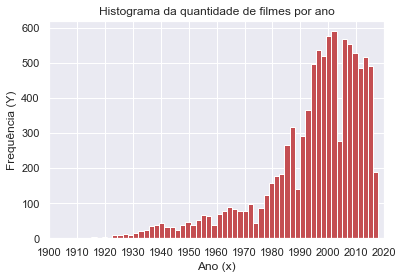

In [132]:
plt.hist(titleYears, bins='auto', color='r')
plt.title("Histograma da quantidade de filmes por ano")
plt.xlim(left=1900, right=2020)
plt.xticks(np.arange(1900, 2025, 10))
plt.xlabel('Ano (x)')
plt.ylabel('Frequência (Y)')
plt.show()